In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch 
import helper
from matplotlib import pyplot as plt

In [2]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,)),
                               ])

In [3]:
trainset = datasets.MNIST('MNIST_data/',download = True,train = True,transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size = 64,shuffle = True)

In [4]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


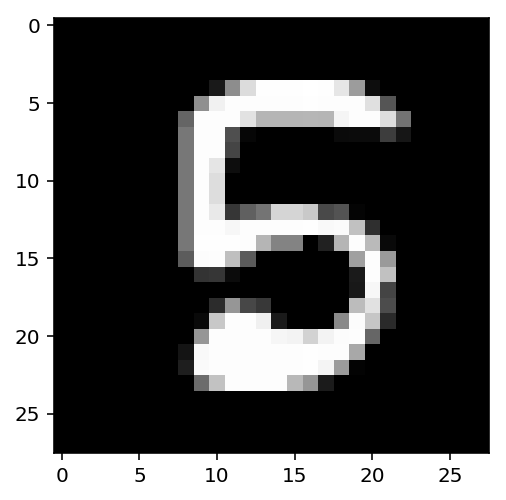

In [5]:
plt.imshow(images[1].numpy().squeeze(),cmap = 'Greys_r')

In [45]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,64),
                     nn.ReLU(),
                     nn.Linear(64,10))
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
logits = model(images)
loss = criterion(logits,labels)

In [46]:
loss.item()

2.3104934692382812

In [48]:
logits.shape

torch.Size([64, 10])

In [52]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim = 1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0],-1)
logps = model(images)
loss1 = criterion(logps,labels)

In [84]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [86]:
print("Initial weights - ",model[0].weight)
images, labels = next(iter(trainloader))
images.resize_(64,784)
optimizer.zero_grad()

Initial weights -  Parameter containing:
tensor([[-0.0100,  0.0139,  0.0103,  ...,  0.0084,  0.0088,  0.0252],
        [-0.0138, -0.0140,  0.0039,  ...,  0.0218, -0.0115,  0.0100],
        [-0.0032,  0.0238,  0.0258,  ..., -0.0215, -0.0063, -0.0243],
        ...,
        [ 0.0026, -0.0204, -0.0031,  ...,  0.0234, -0.0044,  0.0091],
        [ 0.0279, -0.0093,  0.0036,  ..., -0.0088,  0.0326, -0.0054],
        [-0.0045, -0.0092,  0.0135,  ..., -0.0061,  0.0181,  0.0154]],
       requires_grad=True)


In [92]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super.__init__
        self.hidden = nn.Linear(784,256)
        self.output = nn.Linear(256,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax()
    def forward(self,x):
        x = self.hidden(x)
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.softmax(x)
        return x

In [97]:
output = model.forward(images)
loss2 = criterion(output,labels)
loss2.backward()
print('Gradient:',model[0].weight.grad)

Gradient: tensor([[-0.0058, -0.0058, -0.0058,  ..., -0.0058, -0.0058, -0.0058],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023],
        [-0.0013, -0.0013, -0.0013,  ..., -0.0013, -0.0013, -0.0013],
        ...,
        [ 0.0012,  0.0012,  0.0012,  ...,  0.0012,  0.0012,  0.0012],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
        [ 0.0140,  0.0140,  0.0140,  ...,  0.0140,  0.0140,  0.0140]])


In [100]:
optimizer.step()
print('Gradient:',model[0].weight)

Gradient: Parameter containing:
tensor([[-0.0098,  0.0141,  0.0105,  ...,  0.0085,  0.0089,  0.0253],
        [-0.0139, -0.0140,  0.0038,  ...,  0.0217, -0.0116,  0.0099],
        [-0.0031,  0.0239,  0.0258,  ..., -0.0215, -0.0063, -0.0243],
        ...,
        [ 0.0026, -0.0205, -0.0031,  ...,  0.0234, -0.0044,  0.0091],
        [ 0.0278, -0.0093,  0.0036,  ..., -0.0088,  0.0326, -0.0054],
        [-0.0049, -0.0096,  0.0131,  ..., -0.0065,  0.0176,  0.0150]],
       requires_grad=True)


In [104]:
model = nn.Sequential((nn.Linear(784,128)),
                      nn.ReLU(),
                     nn.Linear(128,64),
                      nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.03)
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        optimizer.zero_grad()
        out1 = model.forward(images)
        loss = criterion(out1,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss:{running_loss / len(trainloader)}")

Training loss:0.6288599600987648
Training loss:0.28226290357265393
Training loss:0.21829702974414267
Training loss:0.17634125234984133
Training loss:0.14854502393953453


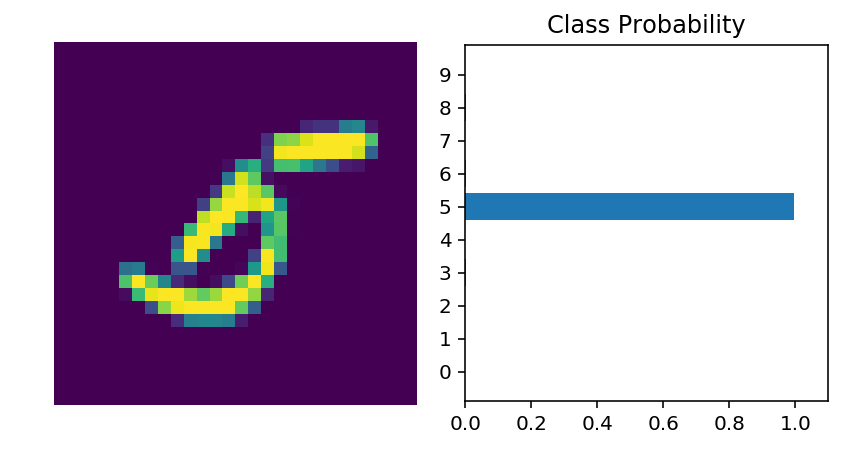

In [123]:
%matplotlib inline
import helper
images, labels = next(iter(trainloader))
img = images[0].view(1,784)
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits,dim = 1)
helper.view_classify(img.view(1,28,28),ps)